In [1]:
import gym
import time
import numpy as np
from collections import deque
import matplotlib.pylab as plt
from DoubleDQN_PER import DoubleDQN_PER

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
env = gym.make('LunarLander-v2')
env.seed(123)

[123]

In [3]:
N_A = env.action_space.n
N_S = env.observation_space.shape[0]
MEMORY_CAPACITY = 20000
TARGET_REP_ITER = 2000
MAX_EPISODES = 1000
E_GREEDY = 0.95
E_INCREMENT = 0.00001
GAMMA = 0.99
LR = 0.0001
BATCH_SIZE = 32
HIDDEN = [400, 100]
RENDER=False

In [4]:
agent = DoubleDQN_PER(
    n_actions=N_A, 
    n_features=N_S, 
    learning_rate=LR, 
    e_greedy=E_GREEDY, 
    reward_decay=GAMMA,
    hidden=HIDDEN, 
    batch_size=BATCH_SIZE, 
    replace_target_iter=TARGET_REP_ITER,
    memory_size=MEMORY_CAPACITY, 
    e_greedy_increment=E_INCREMENT
    )

In [6]:
total_steps = 0
running_r = 0

total_reward = []
aver = deque(maxlen=100)
ep_rewards = []
aver_reward = []

for i_episode in range(MAX_EPISODES):
    s = env.reset()  # (coord_x, coord_y, vel_x, vel_y, angle, angular_vel, l_leg_on_ground, r_leg_on_ground)
    ep_r = 0
    while True:
        if RENDER: env.render()
        a = agent.choose_action(s)
        s_, r, done, _ = env.step(a)
        ep_r += r
        
        agent.store_transition(s, a, r, s_)

        if total_steps > MEMORY_CAPACITY:
            agent.learn()
        if done:
            aver.append(ep_r)
            current_avg = np.mean(aver)
            aver_reward.append(current_avg)
            
            total_reward.append(ep_r)

            if i_episode%50 ==0:
                print(f"episode: {i_episode} \t total steps: {total_steps} \tsum_rewards: {ep_r:.2f} \t avg_reward: {current_avg:.2f} \t eps: {agent.epsilon} \t lr: {agent.lr}")
            break

        s = s_
        total_steps += 1

episode: 0 	 total steps: 77 	sum_rewards: 11.60 	 avg_reward: 11.60 	 eps: 0.5 	 lr: 0.0001
episode: 50 	 total steps: 5385 	sum_rewards: -118.31 	 avg_reward: -127.96 	 eps: 0.5 	 lr: 0.0001
episode: 100 	 total steps: 10263 	sum_rewards: -27.34 	 avg_reward: -118.45 	 eps: 0.5 	 lr: 0.0001
episode: 150 	 total steps: 15165 	sum_rewards: -124.85 	 avg_reward: -129.51 	 eps: 0.5 	 lr: 0.0001
episode: 200 	 total steps: 19776 	sum_rewards: -53.43 	 avg_reward: -137.06 	 eps: 0.5 	 lr: 0.0001
episode: 250 	 total steps: 26079 	sum_rewards: -321.06 	 avg_reward: -168.68 	 eps: 0.5612599999997212 	 lr: 0.0001
episode: 300 	 total steps: 46998 	sum_rewards: 13.05 	 avg_reward: -150.08 	 eps: 0.7709499999987669 	 lr: 0.0001
episode: 350 	 total steps: 92253 	sum_rewards: -57.42 	 avg_reward: -74.22 	 eps: 0.95 	 lr: 0.0001
episode: 400 	 total steps: 139876 	sum_rewards: -24.49 	 avg_reward: -47.80 	 eps: 0.95 	 lr: 0.0001
episode: 450 	 total steps: 186097 	sum_rewards: 140.19 	 avg_reward

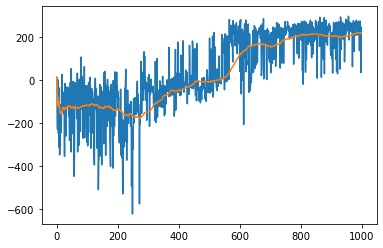

In [7]:
plt.plot(total_reward)
plt.plot(aver_reward)

In [8]:
# Save results
# Save results
fn1 = f"results/results_DDQN_PER_sum_{int(time.time())}"
fn2 = f"results/results_DDQN_PER_avg_{int(time.time())}"
print(fn1)
print(fn2)

results/results_DDQN_PER_sum_1650732510
results/results_DDQN_PER_avg_1650732510


In [9]:
np.save(fn1, total_reward)
np.save(fn2, aver_reward)

# Render

In [14]:
done = False
for _ in range(3):
    s = env.reset()
    while not done:
        env.render()
        a = agent.choose_action(s)
        s_, r, done, _ = env.step(a)
        s = s_
    done= False

In [40]:
from matplotlib import animation
import matplotlib.pyplot as plt
import os
def save_frames_as_gif(frames, filename, interval, fps):

    #Mess with this to change frame size
    fig = plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72, frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    patch = plt.imshow(frames[0], aspect='auto')
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=interval)
    anim.save(filename, writer='Pillow', fps=fps)

In [25]:
#Run the env
frames = []
for _ in range(3):
    done= False
    s = env.reset()
    while not done:
        frames.append(env.render(mode="rgb_array"))
        a = agent.choose_action(s)
        s_, _, done, _ = env.step(a)
        s = s_

env.close()

MovieWriter Pillow unavailable; using Pillow instead.


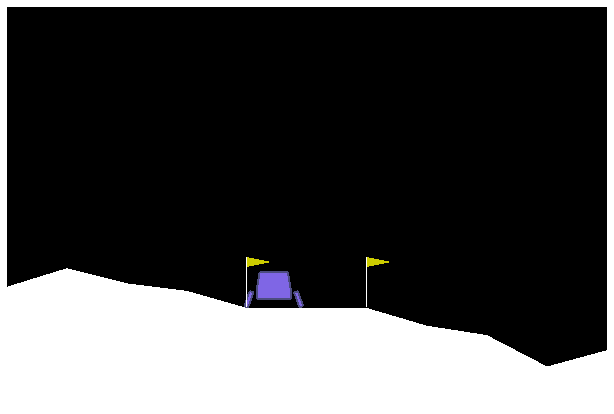

In [49]:
fname_gif = os.path.join("animation","LunarLander_DDQN_PER.gif")
save_frames_as_gif(frames, filename=fname_gif, interval=120, fps=30)